In [1]:
# Init
import glob
import os
import pickle
import sys

module_path = os.path.abspath(os.path.join("../src/simulicronalpha/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import multiprocessing
import warnings

# Imports
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)
# For loading data
import concurrent.futures
import gc
import json
import random

# Plotting imports
import altair as alt
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy import concatenate as c
from numpy import cumsum

In [2]:
# Acc. functions
def returnLast(lst):
    return lst[-1]


def colorRanges(i):
    # Construct the colormap
    current_palette = sns.color_palette("muted", n_colors=5)
    cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
    # range and stuff
    if i == 0:
        return "0"
    elif i > 0 and i <= 20:
        return "1-20"
    elif i > 20 and i <= 50:
        return "20-50"
    elif i > 50 and i <= 100:
        return "50-100"
    elif i > 100 and i <= 200:
        return "100-200"
    elif i > 200 and i <= 300:
        return "200-300"
    elif i > 300:
        return ">300"


# Since pickle format is not working as intended.
# Insert angry thoughts abouts pickle format here
# A function to open pickle files and convert into json
def pickleToJson(resultDir):
    for file in glob.glob(os.path.join(resultDir, "*.pickle")):
        with open(file, "rb") as f:
            gc.disable()
            data = pickle.load(f)
            del data["TEset"]
            gc.enable()
            with open(file + ".json", "w") as fp:
                json.dump(data, fp)
    return 0

In [3]:
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

In [4]:
# Path to results
resultDir = "/home/siddharth/git/Simulicron/Project_1C/etaVsTr/"

# Convert them to json
returnValue = pickleToJson(resultDir)

In [10]:
# Read the json files into pandas dataframe
SimulationRecords = []
for filename in glob.glob(os.path.join(resultDir, "*.pickle.json")):
    with open(filename, 'r') as file:
        SimulationRecords.append(json.load(file))

SimulationResultsDataFrame = pd.DataFrame(SimulationRecords)

In [11]:
SimulationResultsDataFrame

,State,Generatrion,NTE,AvgCopyNum,CopyNumVar,TEfamilyCN,TEfamilyVR,TEfamilyRg,AvgFit,HGTGen,...,NTI,Freq,TRate,Tau,selPen,piRNA,TEpi,FitnessFunction,epistasisCoefficient,TECoreOverlap
0,FLUX,2501,358976,"[0.2, 0.338, 0.612, 0.981, 1.656, 2.896, 5.023...","[0.35799999999999993, 0.7817559999999999, 2.04...","{'1': [0.2, 0.338, 0.612, 0.981, 1.656, 2.896,...","{'1': [[0.35799999999999993], [0.7817559999999...","{'1': [0.0, 0.008, 0.015, 0.016, 0.041, 0.071,...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.8, 0.7064972653244818]",1.0,0.0,"[154, 155, 156, 157, 158, 178, 179, 180, 181, ...","{'1': 7.127, '2': 4.946}",1,0.0,"[0, {'1': 0.006, '2': 0.0}, {'1': 0.017, '2': ..."
1,FLUX,2501,433254,"[0.2, 0.261, 0.375, 0.559, 0.844, 1.199, 1.567...","[0.36, 0.5148789999999999, 0.794375, 1.358519,...","{'1': [0.2, 0.261, 0.375, 0.559, 0.844, 1.199,...","{'1': [[0.36], [0.5148789999999999], [0.794375...","{'1': [0.0, 0.0, 0.003, 0.01, 0.014, 0.031, 0....","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.4, 0.3908630910914387]",1.0,0.0,"[17, 18, 19, 20, 21, 38, 39, 40, 41, 42, 330, ...","{'1': 8.863, '2': 7.038}",1,0.0,"[0, {'1': 0.001, '2': 0.0}, {'1': 0.004, '2': ..."
2,FLUX,2501,364208,"[0.2, 0.213, 0.232, 0.243, 0.277, 0.284, 0.305...","[0.35999999999999993, 0.30563100000000004, 0.3...","{'1': [0.2, 0.213, 0.232, 0.243, 0.277, 0.284,...","{'1': [[0.35999999999999993], [0.3056310000000...","{'1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.004, ...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.03, 0.8382575210114473]",1.0,0.0,"[84, 85, 86, 87, 88, 189, 190, 191, 192, 193, ...","{'1': 2.996, '2': 3.766}",1,0.0,"[0, {'1': 0.0, '2': 0.0}, {'1': 0.0, '2': 0.0}..."
3,FLUX,2501,359293,"[0.2, 0.243, 0.277, 0.386, 0.528, 0.647, 0.849...","[0.34199999999999997, 0.421951, 0.482271000000...","{'1': [0.2, 0.243, 0.277, 0.386, 0.528, 0.647,...","{'1': [[0.34199999999999997], [0.421951], [0.4...","{'1': [0.0, 0.002, 0.002, 0.002, 0.003, 0.008,...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.3, 0.022291370444287417]",1.0,0.0,"[20, 21, 22, 23, 24, 103, 104, 105, 106, 107, ...","{'1': 8.812, '2': 6.782}",1,0.0,"[0, {'1': 0.002, '2': 0.0}, {'1': 0.002, '2': ..."
4,FLUX,2501,813495,"[0.2, 0.392, 0.784, 1.435, 2.523, 4.38, 7.644,...","[0.334, 1.0283359999999997, 2.5653439999999996...","{'1': [0.2, 0.392, 0.784, 1.435, 2.523, 4.38, ...","{'1': [[0.334], [1.0283359999999997], [2.56534...","{'1': [0.0, 0.008, 0.014, 0.027, 0.064, 0.11, ...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.9, 0.14982213912192843]",1.0,0.0,"[137, 138, 139, 140, 141, 177, 178, 179, 180, ...","{'1': 8.046, '2': 7.86}",1,0.0,"[0, {'1': 0.006, '2': 0.0}, {'1': 0.018, '2': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,FLUX,2501,421417,"[0.2, 0.347, 0.51, 0.842, 1.307, 2.194, 3.465,...","[0.37599999999999995, 0.854591, 1.439900000000...","{'1': [0.2, 0.347, 0.51, 0.842, 1.307, 2.194, ...","{'1': [[0.37599999999999995], [0.854591], [1.4...","{'1': [0.0, 0.01, 0.026, 0.041, 0.058, 0.092, ...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.7, 0.7064972653244818]",1.0,0.0,"[154, 155, 156, 157, 158, 178, 179, 180, 181, ...","{'1': 5.007, '2': 6.138}",1,0.0,"[0, {'1': 0.008, '2': 0.0}, {'1': 0.023, '2': ..."
6496,FLUX,2501,479173,"[0.2, 0.317, 0.523, 1.018, 1.762, 2.953, 5.607...","[0.356, 0.7625109999999999, 1.615471, 4.239676...","{'1': [0.2, 0.317, 0.523, 1.018, 1.762, 2.953,...","{'1': [[0.356], [0.7625109999999999], [1.61547...","{'1': [0.0, 0.004, 0.009, 0.018, 0.043, 0.073,...","[1.0000000000000007, 1.0000000000000007, 1.000...",50,...,2,"[0.2, 0.2]","[0.9, 0.1920757179217052]",1.0,0.0,"[23, 24, 25, 26, 27, 41, 42, 43, 44, 45, 215, ...","{'1': 8.996, '2': 5.482}",1,0.0,"[0, {'1': 0.006, '2': 0.0}, {'1': 0.008, '2': ..."
6497,FLUX,2501,528062,"[0.2, 0.281, 0

In [13]:
# Create a copy for inplace handling
resultDataframeC = SimulationResultsDataFrame.copy()

In [15]:
# Perform some data wrangling
resultDataframeC[["TranspositionRate_1", "TranspositionRate_2"]] = pd.DataFrame(
    resultDataframeC.TRate.tolist(), index=resultDataframeC.index
)
resultDataframeC[["TE_1_CN", "TE_2_CN"]] = resultDataframeC["TEfamilyCN"].apply(
    pd.Series
)
resultDataframeC[["TE_1_RG", "TE_2_RG"]] = resultDataframeC["TEfamilyRg"].apply(
    pd.Series
)
resultDataframeC[["TE_1_pi", "TE_2_pi"]] = resultDataframeC["TEpi"].apply(
    pd.Series
)

# Add column for the last acn (average copy number) for each transposon family
resultDataframeC["TE_1_ACN"] = resultDataframeC["TE_1_CN"].apply(
    lambda x: returnLast(x)
)
resultDataframeC["TE_2_ACN"] = resultDataframeC["TE_2_CN"].apply(
    lambda x: returnLast(x)
)

# Add column for copies not present in clusters
resultDataframeC["TE_1_NCN"] = (
    resultDataframeC["TE_1_ACN"] - resultDataframeC["TE_1_pi"]
)
resultDataframeC["TE_2_NCN"] = (
    resultDataframeC["TE_2_ACN"] - resultDataframeC["TE_2_pi"]
)
resultDataframeC["TE_1_NCN_l"] = np.log(
    resultDataframeC["TE_1_ACN"] - resultDataframeC["TE_1_pi"]
)
resultDataframeC["TE_2_NCN_l"] = np.log(
    resultDataframeC["TE_2_ACN"] - resultDataframeC["TE_2_pi"]
)

# Get ranges for adding colors later
resultDataframeC["TE_1_NCN_R"] = resultDataframeC["TE_1_NCN"].apply(
    lambda x: colorRanges(x)
)
resultDataframeC["TE_2_NCN_R"] = resultDataframeC["TE_2_NCN"].apply(
    lambda x: colorRanges(x)
)

# Some wrangling for plotly go
x = resultDataframeC["ETA"]
y = resultDataframeC["selPen"]
TE1ACN = resultDataframeC["TE_1_ACN"]
TE2ACN = resultDataframeC["TE_2_ACN"]

# Convert count to log scale
resultDataframeC["TE_1_ACN_l"] = np.log(resultDataframeC["TE_1_ACN"])
resultDataframeC["TE_2_ACN_l"] = np.log(resultDataframeC["TE_2_ACN"])

/home/siddharth/mambaforge/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
# Custom color palette
ranges = ["0", "1-50","20-50","50-100", "100-200", "200-300", ">300"]
colors = sns.color_palette("inferno", n_colors=len(ranges))
palette = dict(zip(ranges, colors))

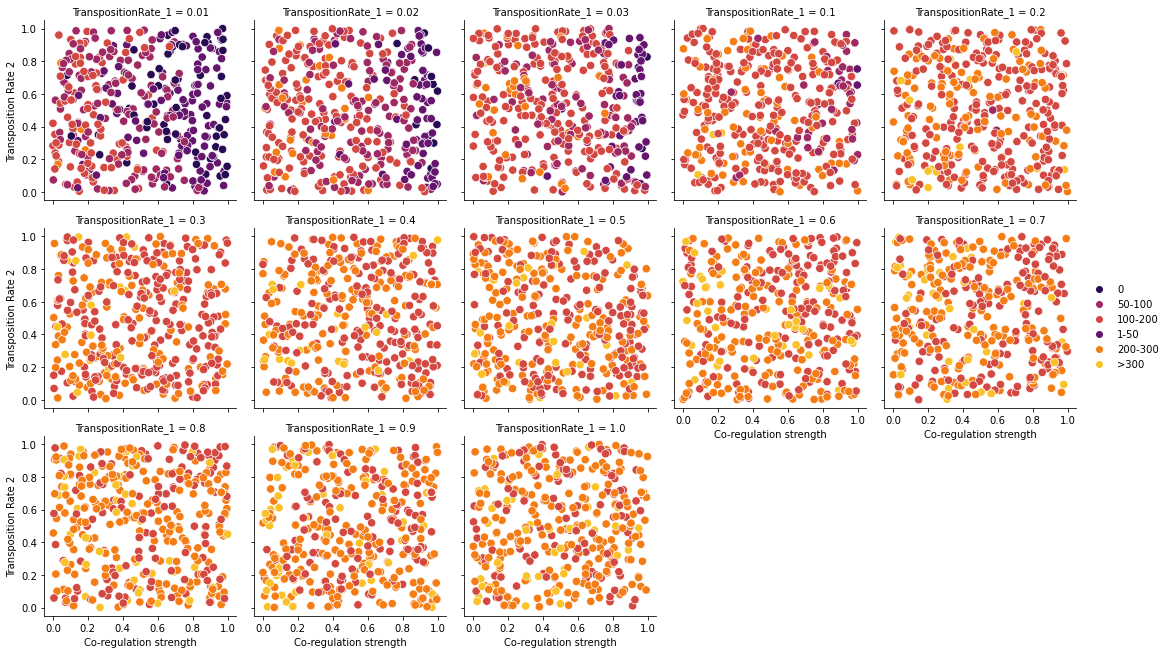

In [17]:
g = sns.FacetGrid(resultDataframeC, col="TranspositionRate_1", col_wrap=5, despine=True)
g.map_dataframe(
    sns.scatterplot,
    x="ETA",
    y="TranspositionRate_2",
    hue="TE_1_NCN_R",
    palette=palette,
    s=70,
)
g.set_axis_labels("Co-regulation strength", "Transposition Rate 2")
g.add_legend()

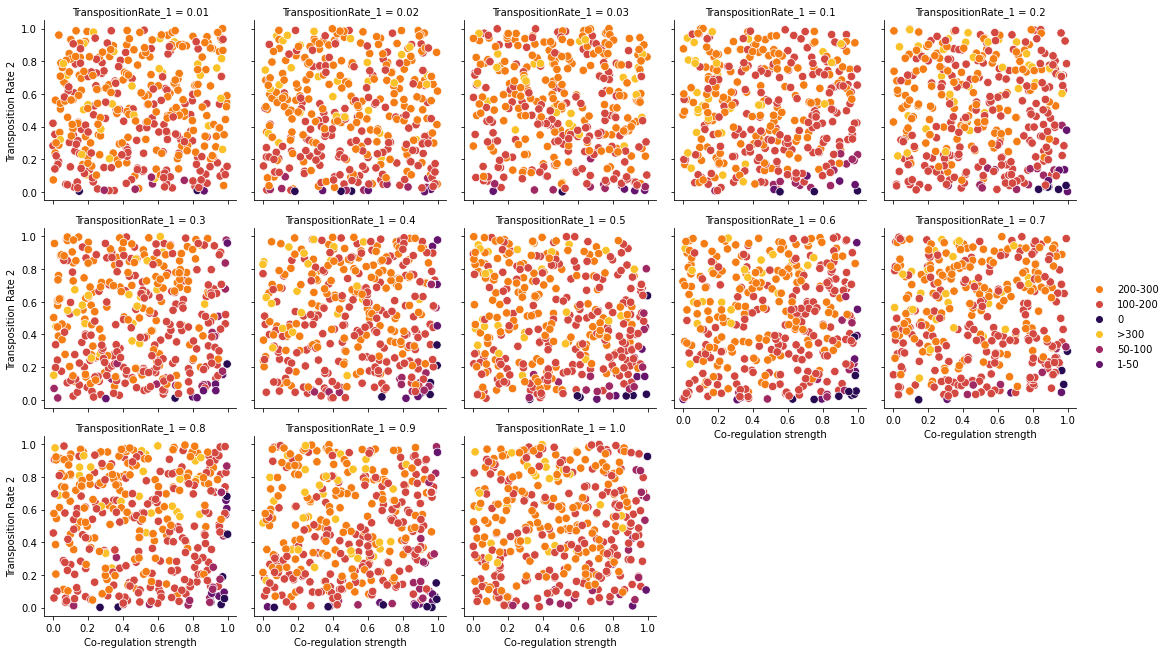

In [18]:
g = sns.FacetGrid(resultDataframeC, col="TranspositionRate_1", col_wrap=5, despine=True)
g.map_dataframe(
    sns.scatterplot,
    x="ETA",
    y="TranspositionRate_2",
    hue="TE_2_NCN_R",
    palette=palette,
    s=70,
)
g.set_axis_labels("Co-regulation strength", "Transposition Rate 2")
g.add_legend()

In [6]:
# Break DF by TE1 tr
resultDataframe001 = resultDataframeC[resultDataframeC["TranspositionRate_1"] == 0.01]
resultDataframe005 = resultDataframeC[resultDataframeC["TranspositionRate_1"] == 0.05]
resultDataframe010 = resultDataframeC[resultDataframeC["TranspositionRate_1"] == 0.10]
resultDataframe015 = resultDataframeC[resultDataframeC["TranspositionRate_1"] == 0.15]
resultDataframe020 = resultDataframeC[resultDataframeC["TranspositionRate_1"] == 0.20]

In [ ]:
# figFacetTE1 = px.scatter(resultDataframeC, y="TranspositionRate_2", x="ETA", color="TE_1_NCN_R", facet_col="TranspositionRate_1", category_orders={"TranspositionRate_1": [0.01, 0.05, 0.10, 0.15, 0.20],})
figFacetTE1 = px.scatter(
    resultDataframeC,
    y="TranspositionRate_2",
    x="ETA",
    color="TE_1_NCN_R",
    facet_col="TranspositionRate_1",
    category_orders={
        "TranspositionRate_1": [0.01, 0.05, 0.10, 0.15, 0.20],
    },
)

In [ ]:
figFacetTE2 = px.scatter(
    resultDataframeC,
    y="TranspositionRate_2",
    x="ETA",
    color="TE_2_NCN_R",
    facet_col="TranspositionRate_1",
    category_orders={
        "TranspositionRate_1": [0.01, 0.05, 0.10, 0.15, 0.20],
    },
)

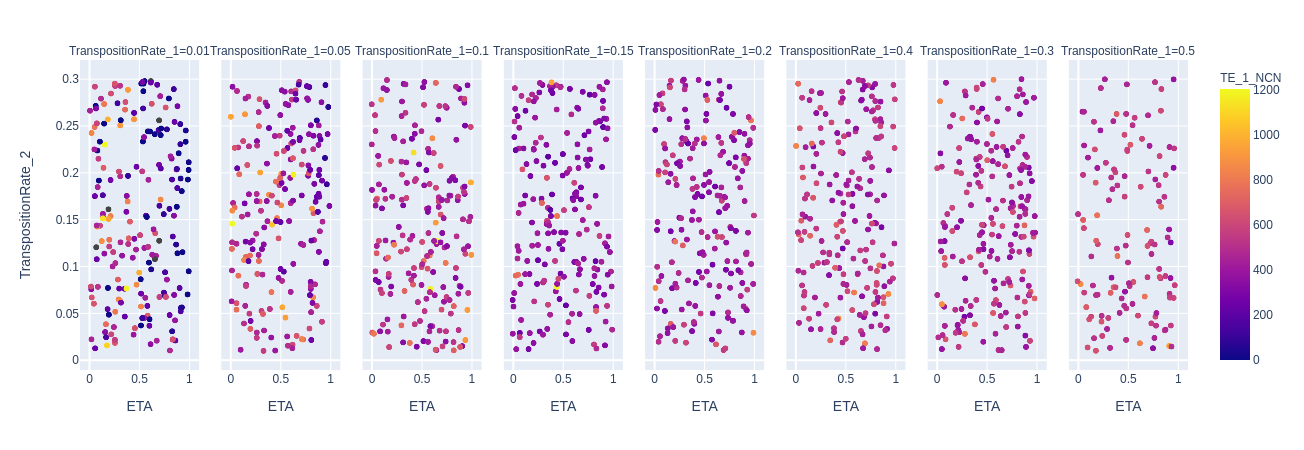

In [14]:
figFacetTE1

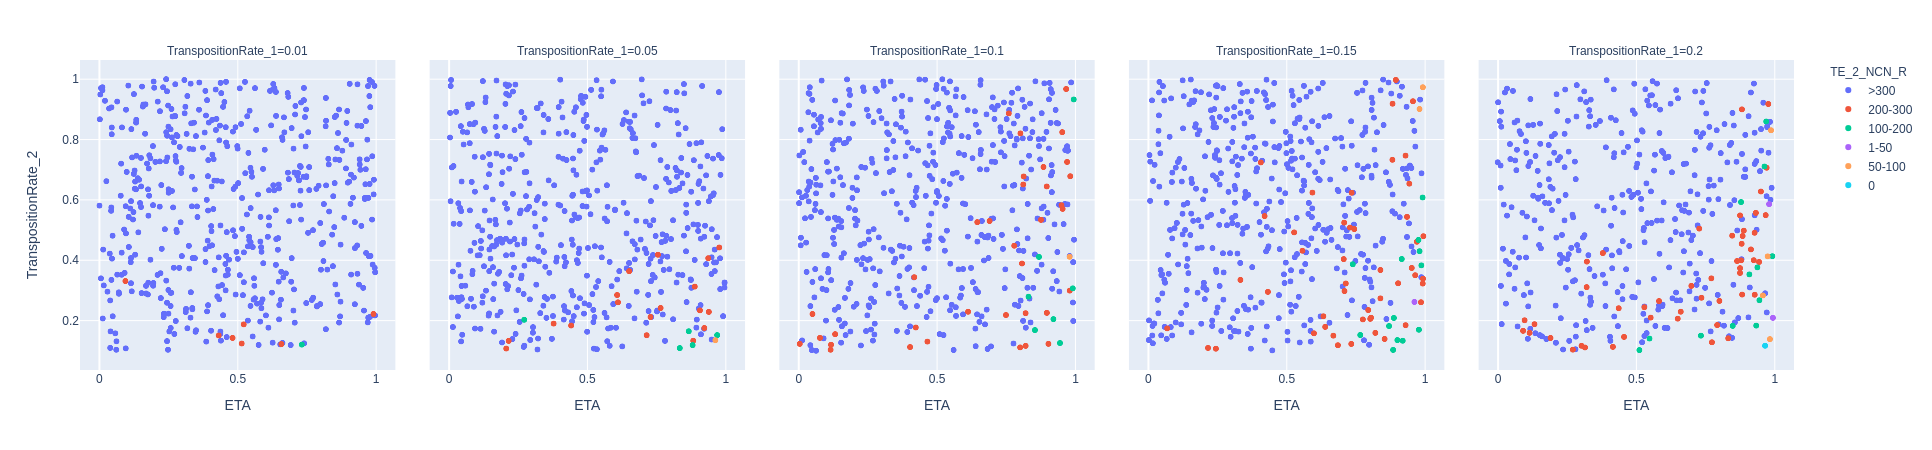

In [10]:
figFacetTE2

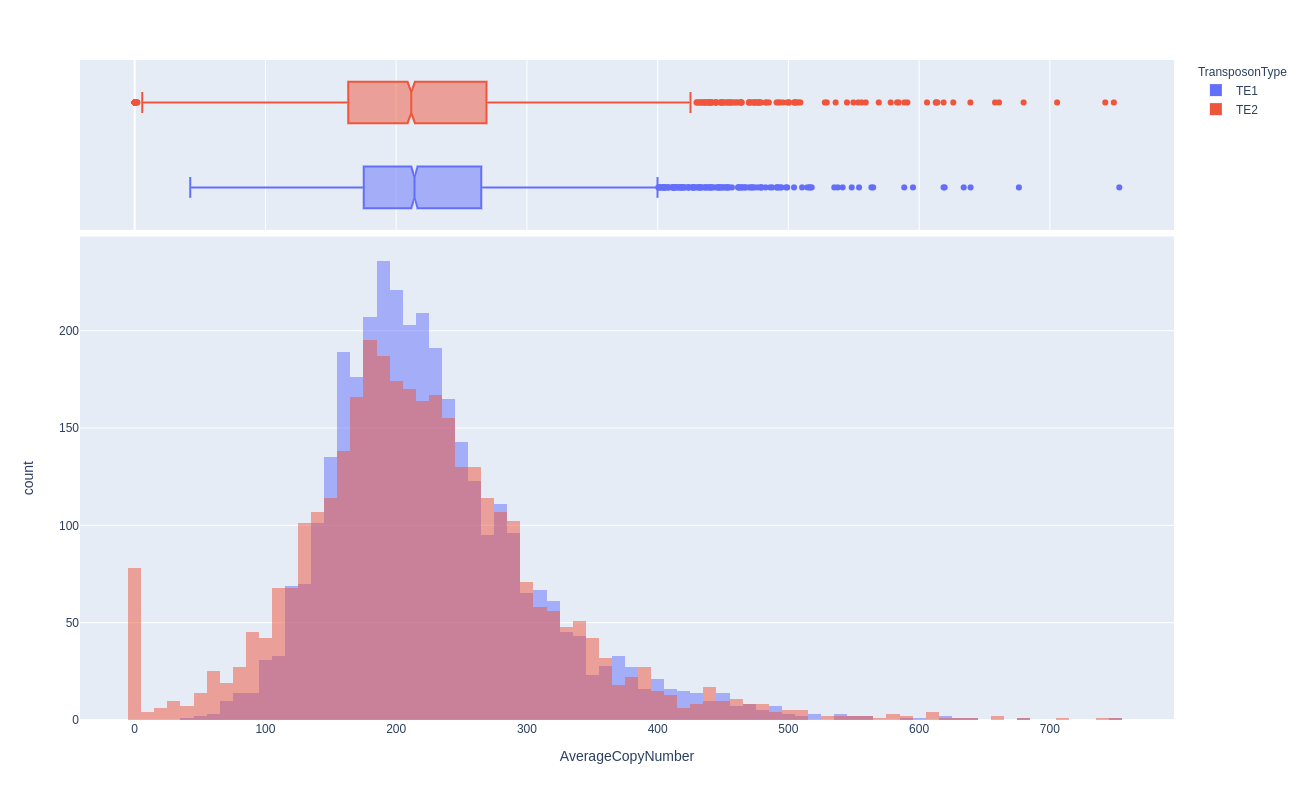

In [9]:
# Plot the histogram
# Some dummy arrays and dataframe
TL = ["TE1"] * len(TE1ACN) + ["TE2"] * len(TE2ACN)
ACN = TE1ACN.tolist() + TE2ACN.tolist()
histoFrame = pd.DataFrame({"TransposonType": TL, "AverageCopyNumber": ACN})
fig3 = px.histogram(
    histoFrame,
    x="AverageCopyNumber",
    color="TransposonType",
    width=800,
    height=800,
    marginal="box",
    barmode="overlay",
)
fig3